In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel

In [28]:
X_train_raw = pd.read_csv('X_train.csv')
X_test_raw = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

In [29]:
tree = DecisionTreeClassifier(random_state=0, criterion='entropy')
tree.fit(X_train_raw, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [30]:
model = SelectFromModel(tree, prefit=True)
X_train = model.transform(X_train_raw)
X_test = model.transform(X_test_raw)

In [54]:
import scikitplot as skplt

ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, random_state=0), n_estimators=300, random_state=0)
ada.fit(X_train, y_train)
y_hat = ada.predict_proba(X_test)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


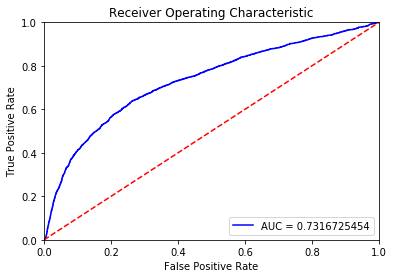

In [58]:
from sklearn import metrics

y_hat_ada = ada.predict_proba(X_test)
fpr, tpr, threshold = metrics.roc_curve(y_test, y_hat_ada[:,1])
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.10f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [56]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=300, max_depth=2, random_state=0, criterion='entropy')
clf.fit(X_train, y_train)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

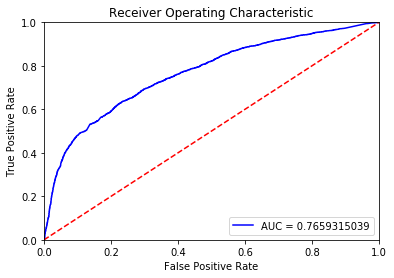

In [59]:
from sklearn import metrics

y_hat_rf = clf.predict_proba(X_test)
fpr, tpr, threshold = metrics.roc_curve(y_test, y_hat_rf[:,1])
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.10f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [42]:
pd.DataFrame(y_hat_ada).to_csv('ada.csv', index = False)
pd.DataFrame(y_hat_rf).to_csv('rf.csv', index = False)

In [43]:
roc_auc

0.7659315039206889

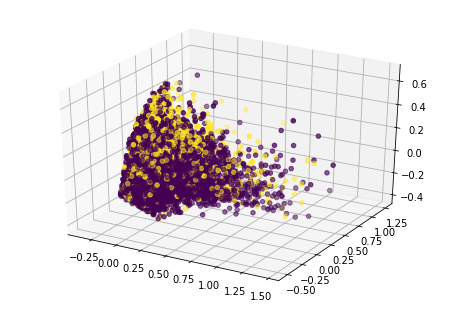

In [89]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c = y_train.values.ravel())

In [84]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_train)

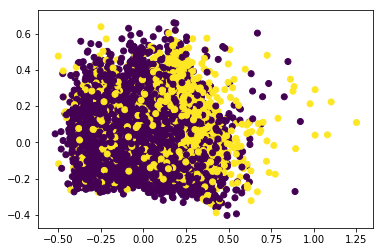

In [87]:
plt.scatter(X_pca[:,1], X_pca[:,2], c = y_train.values.ravel())

In [93]:
from pandas.tools.plotting import parallel_coordinates

parallel_coordinates(X_train)
plt.show()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


TypeError: parallel_coordinates() missing 1 required positional argument: 'class_column'

In [91]:
X_train

array([[1.26582278e-01, 2.58620690e-01, 3.00000000e-01, ...,
        4.08373591e-03, 5.44394402e-03, 3.78499847e-03],
       [3.41772152e-01, 1.20689655e-01, 0.00000000e+00, ...,
        3.17117552e-02, 1.22289457e-02, 9.23078087e-04],
       [5.31645570e-01, 3.79310345e-01, 2.00000000e-01, ...,
        4.86972625e-02, 0.00000000e+00, 3.38588069e-04],
       ...,
       [1.01265823e-01, 3.62068966e-01, 2.00000000e-01, ...,
        1.61030596e-03, 2.34450647e-03, 0.00000000e+00],
       [7.59493671e-02, 5.00000000e-01, 2.00000000e-01, ...,
        8.27536232e-03, 2.34450647e-03, 1.89155346e-03],
       [4.68354430e-01, 1.55172414e-01, 2.00000000e-01, ...,
        6.97906602e-03, 7.43389078e-01, 2.24943537e-02]])